In [1]:
import numpy as np
#设置一下np的输出格式
np.set_printoptions(threshold=100,precision= 2,suppress=True)
#定义测试数据
M = np.array([[1,1,1,2,1],
              [2,3,2,4,2],
              [8,8,8,16,8],
              [9,9,9,12,9],
              [4,4,4,8,4], 
              [2,2,2,4,2]])

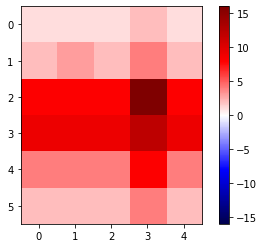

In [2]:
#定义可视化函数，方便后续矩阵绘制
def plotM(M,vmax):
    import matplotlib.pyplot as plt
    #绘制矩阵
    plt.imshow(M,vmin = -vmax,vmax = vmax,cmap = 'seismic')
    #显示颜色的色标
    plt.colorbar()
    plt.show()
plotM(M,M.max())

In [36]:

#引入NMF方法
from sklearn.decomposition import NMF
#定义NMF模型，给定参数r=2
model = NMF(n_components=2, init='random', random_state=0)
#模型训练
model.fit(M)
#模型测试，得到W矩阵和H矩阵
W = model.transform(M)
H = model.components_


In [37]:
W

array([[0.48, 0.05],
       [0.96, 0.31],
       [3.81, 0.4 ],
       [2.86, 2.84],
       [1.91, 0.2 ],
       [0.95, 0.1 ]])

In [38]:
H

array([[1.97, 2.  , 1.97, 4.2 , 1.97],
       [1.18, 1.17, 1.18, 0.  , 1.18]])

In [39]:
#重构矩阵
M_ = np.dot(W,H)
M_

array([[ 1.  ,  1.01,  1.  ,  2.  ,  1.  ],
       [ 2.24,  2.27,  2.24,  4.01,  2.24],
       [ 7.97,  8.1 ,  7.97, 16.  ,  7.97],
       [ 8.98,  9.06,  8.98, 12.  ,  8.98],
       [ 3.98,  4.05,  3.98,  8.  ,  3.98],
       [ 1.99,  2.03,  1.99,  4.  ,  1.99]])

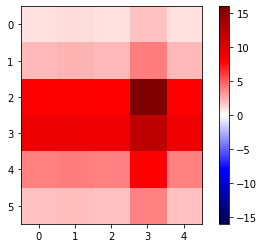

In [7]:
#绘制重构的矩阵
plotM(M_,M.max())

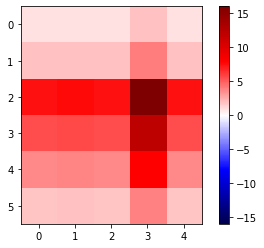

In [41]:
#特征1重构的矩阵
M1 = np.dot(W[:,:1],H[:1,:])
plotM(M1,M.max())

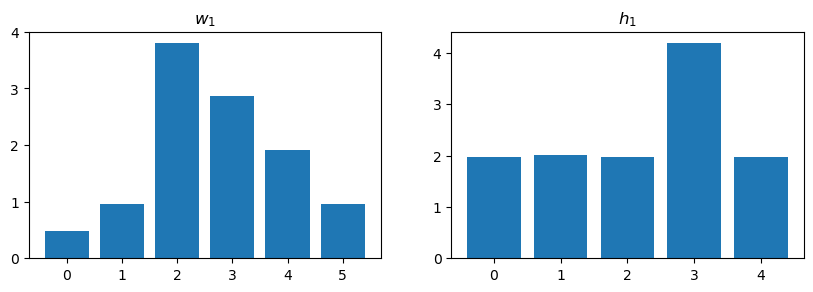

In [42]:
#模式1的w1与h1向量可视化
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,3),dpi = 100)
ax1 = plt.subplot(121)
plt.sca(ax1)
plt.bar(range(6),W[:,0])
plt.title('$w_1$')
ax2 = plt.subplot(122)
plt.sca(ax2)
plt.bar(range(5),H[0,:])
plt.title('$h_1$')
plt.show()

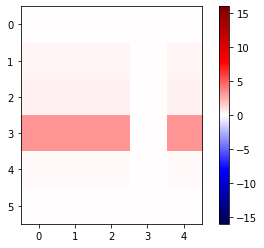

In [45]:
#特征2重构的矩阵
M2 = np.dot(W[:,1:2],H[1:2,:])
plotM(M2,M.max())

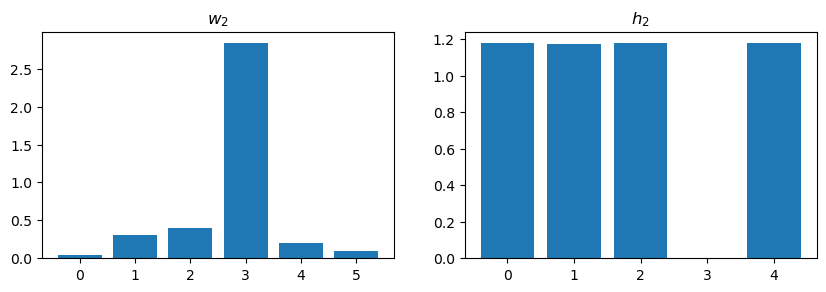

In [44]:
#特征2的w2与h2向量可视化
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,3),dpi = 100)
ax1 = plt.subplot(121)
plt.sca(ax1)
plt.bar(range(6),W[:,1])
plt.title('$w_2$')
ax2 = plt.subplot(122)
plt.sca(ax2)
plt.bar(range(5),H[1,:])
plt.title('$h_2$')
plt.show()